Dataset downloaded to: /kaggle/input/titanic-dataset
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
uniqu

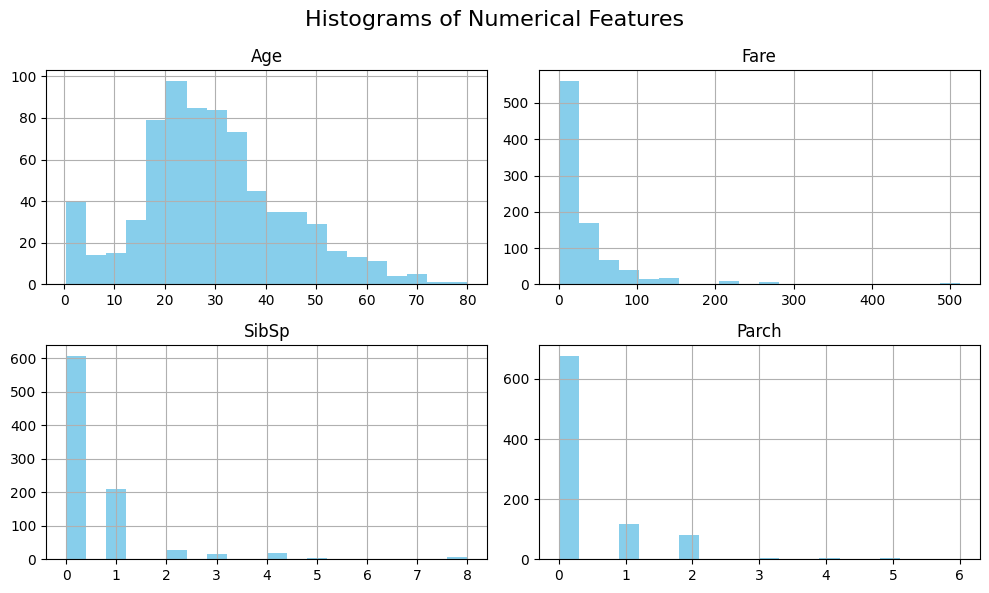

/tmp/ipython-input-1-585656380.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


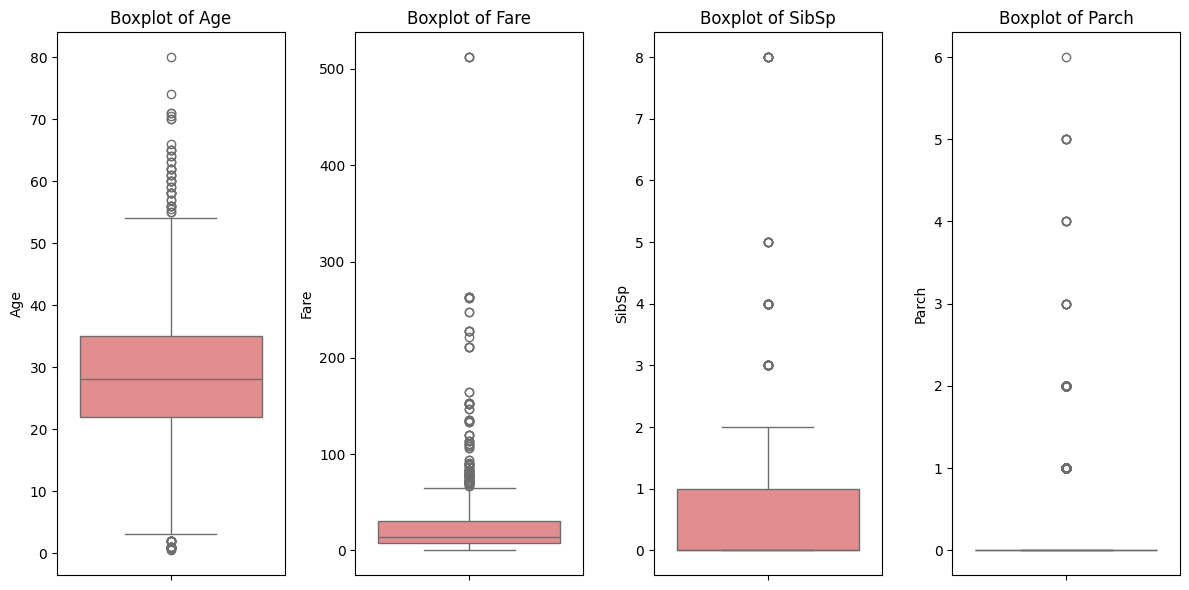

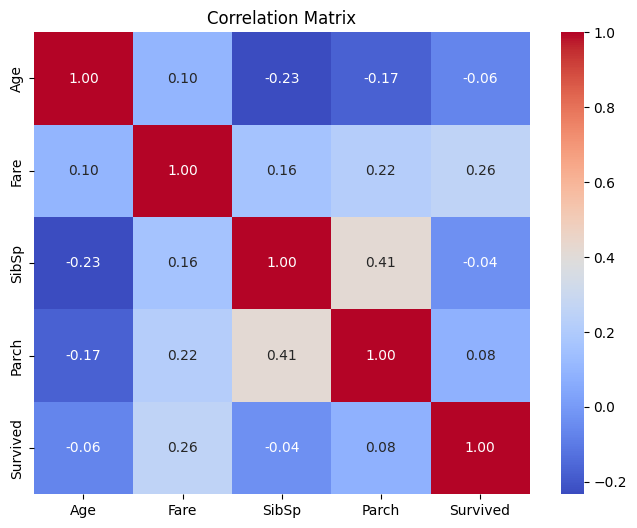

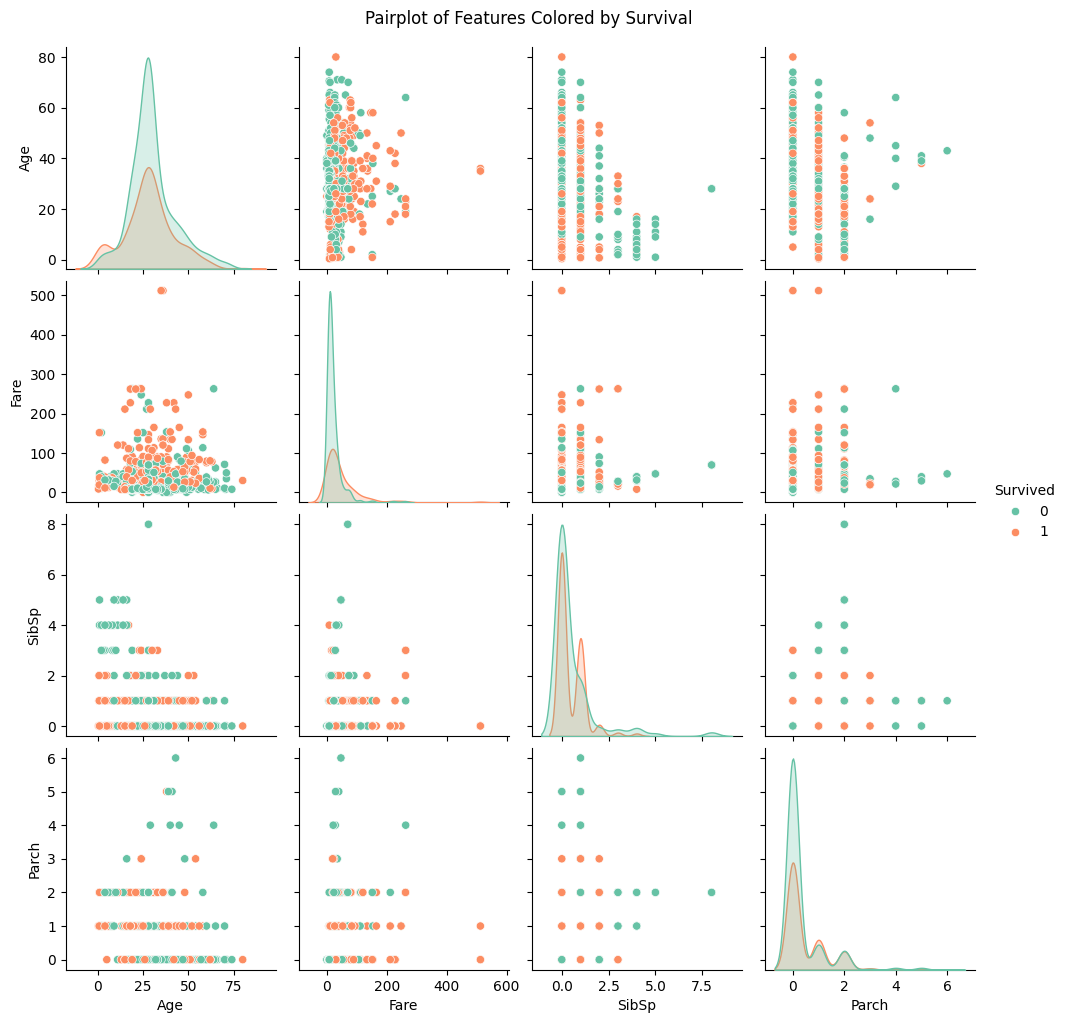

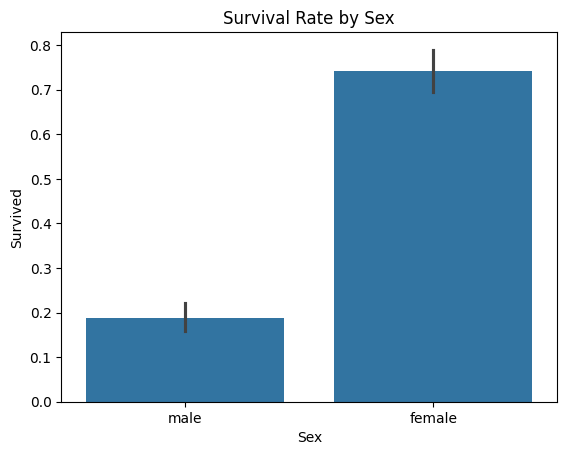

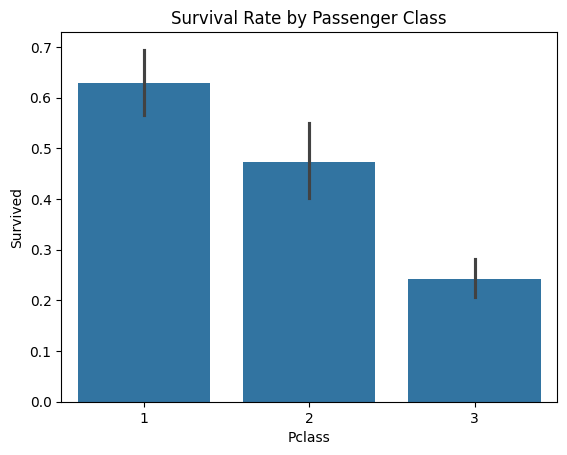


Key Observations:
- Women had higher survival rate than men.
- Passengers in 1st class had higher survival rate.
- Higher fare correlates with higher chance of survival.


In [ ]:
# 🚢 Titanic Dataset - Task 2: EDA in Google Colab

# 🧰 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# 📥 Install kagglehub to download dataset
!pip install -q kagglehub
import kagglehub

# 📦 Download Titanic dataset from Kaggle
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Dataset downloaded to:", path)

# 🗃 Load the dataset
df = pd.read_csv(os.path.join(path, 'Titanic-Dataset.csv'))

# 🧾 1. Summary Statistics
print("Basic Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

# 🔍 Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 🎨 2. Histograms for Numerical Features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols].hist(bins=20, figsize=(10, 6), layout=(2, 2), color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# 📦 Fill missing Age for now to allow plots
df['Age'].fillna(df['Age'].median(), inplace=True)

# 📊 3. Boxplots to Detect Outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 🔗 4. Correlation Matrix
corr = df[numerical_cols + ['Survived']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 📈 5. Pairplot (visualizing relationships)
sns.pairplot(df[numerical_cols + ['Survived']], hue="Survived", palette="Set2")
plt.suptitle("Pairplot of Features Colored by Survival", y=1.02)
plt.show()

# 🧠 6. Feature-level Inference Examples
# Plot survival rates by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

# Survival by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Plot Fare distribution colored by Survived
fig = px.histogram(df, x="Fare", color="Survived", nbins=50,
                   title="Fare Distribution by Survival Status")
fig.show()

# 🎯 Observations (write manually or print key patterns)
print("\nKey Observations:")
print("- Women had higher survival rate than men.")
print("- Passengers in 1st class had higher survival rate.")
print("- Higher fare correlates with higher chance of survival.")
